## 사용 library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

## Data load

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

## 데이터 확인

> 데이터 읽기

In [4]:
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [6]:
test.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [8]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


> 결측값 확인

In [9]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [10]:
test.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
dtype: int64

> Train 시각화

array([[<AxesSubplot:title={'center':'본사정원수'}>,
        <AxesSubplot:title={'center':'본사휴가자수'}>,
        <AxesSubplot:title={'center':'본사출장자수'}>],
       [<AxesSubplot:title={'center':'본사시간외근무명령서승인건수'}>,
        <AxesSubplot:title={'center':'현본사소속재택근무자수'}>,
        <AxesSubplot:title={'center':'중식계'}>],
       [<AxesSubplot:title={'center':'석식계'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

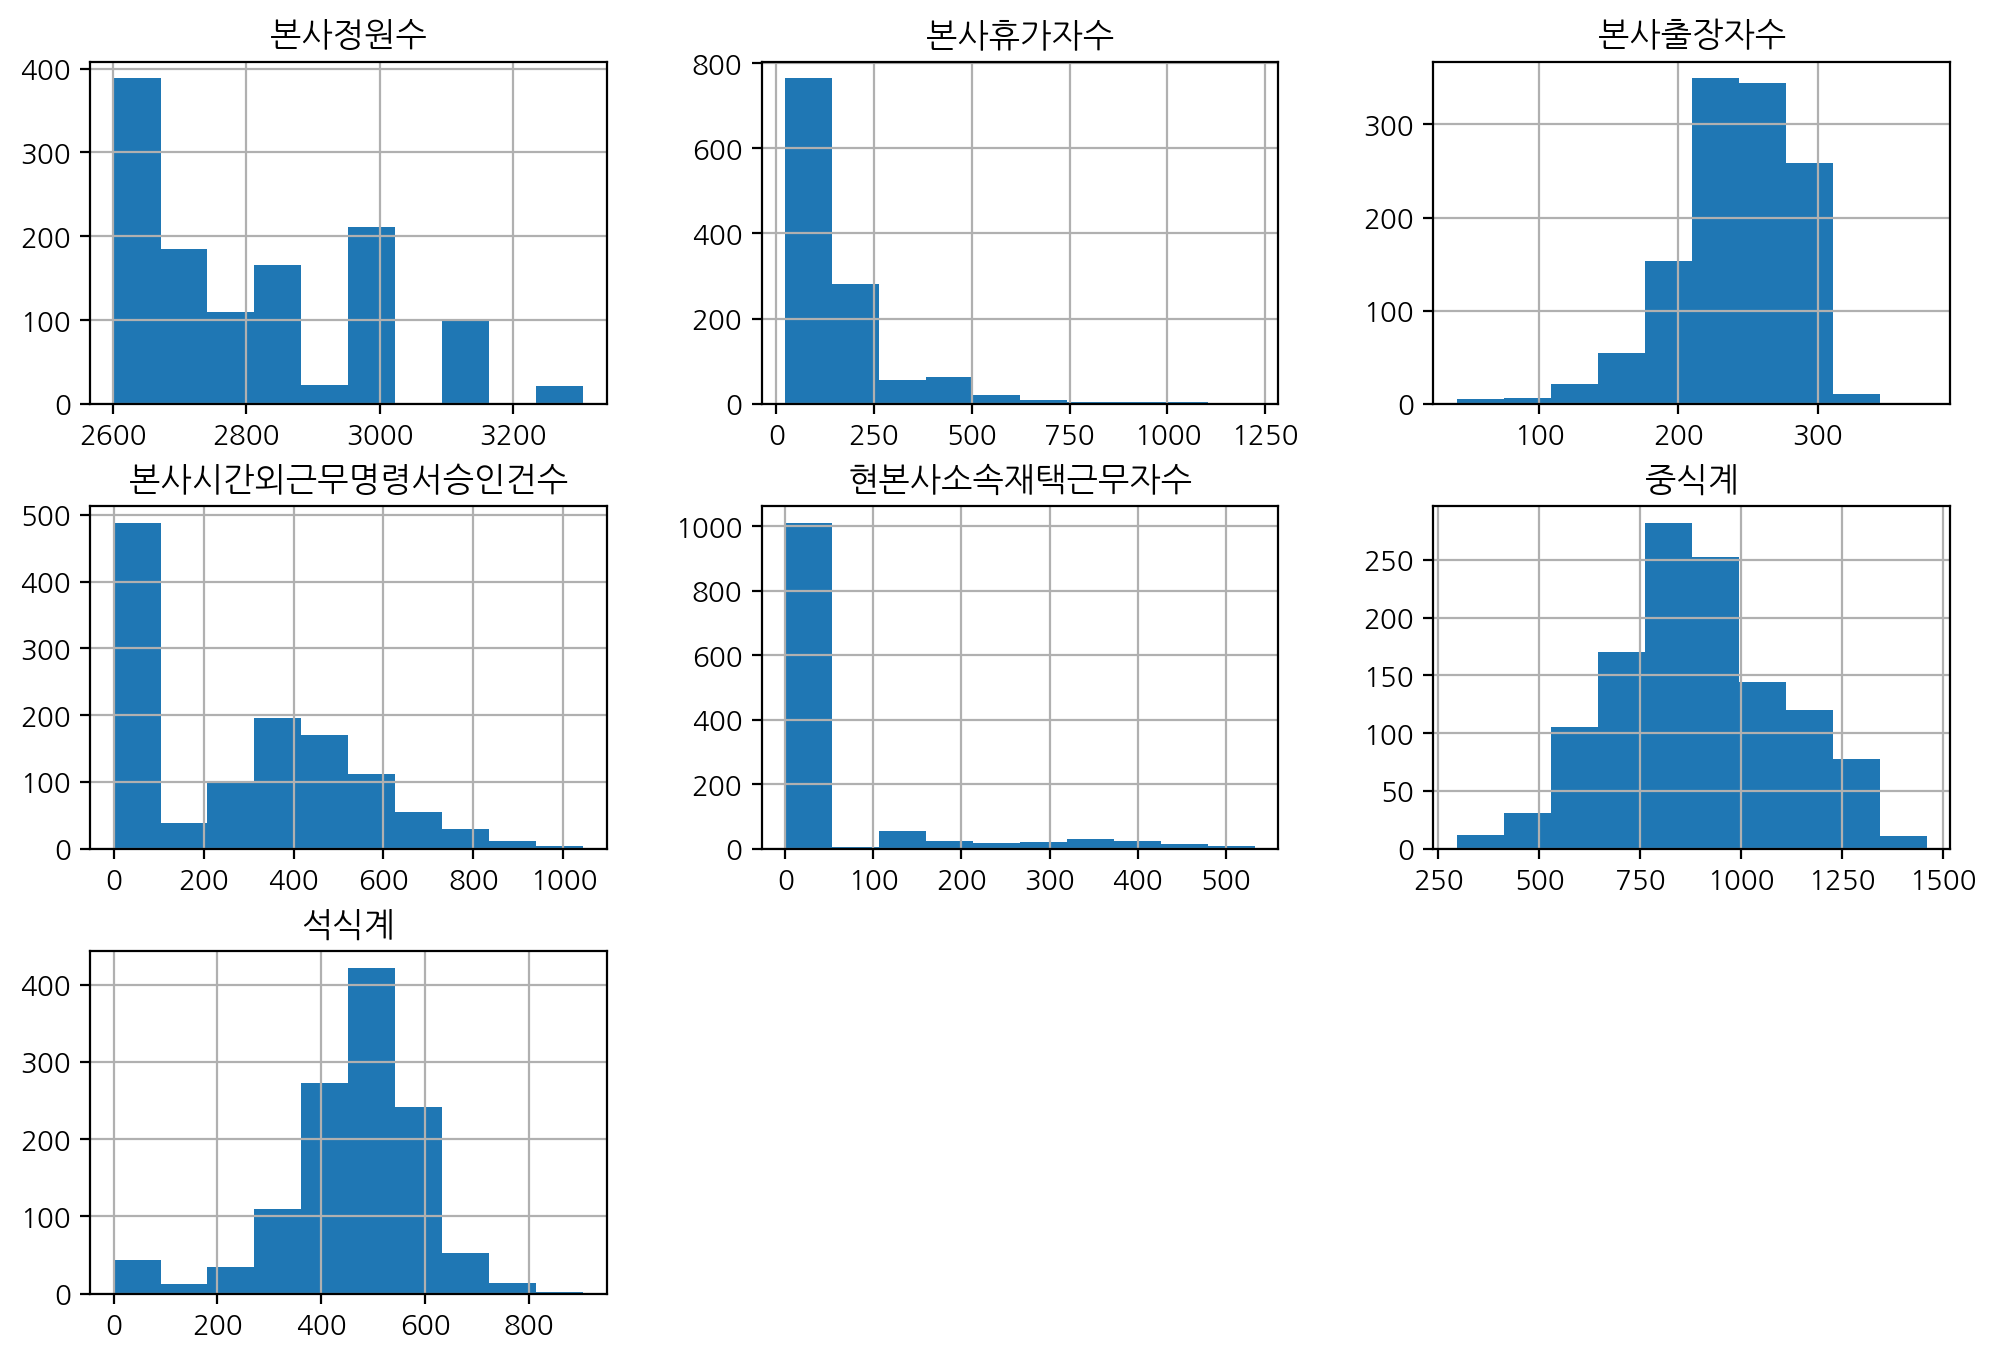

In [11]:
train.hist(figsize=(12,8))

<AxesSubplot:xlabel='석식계', ylabel='Count'>

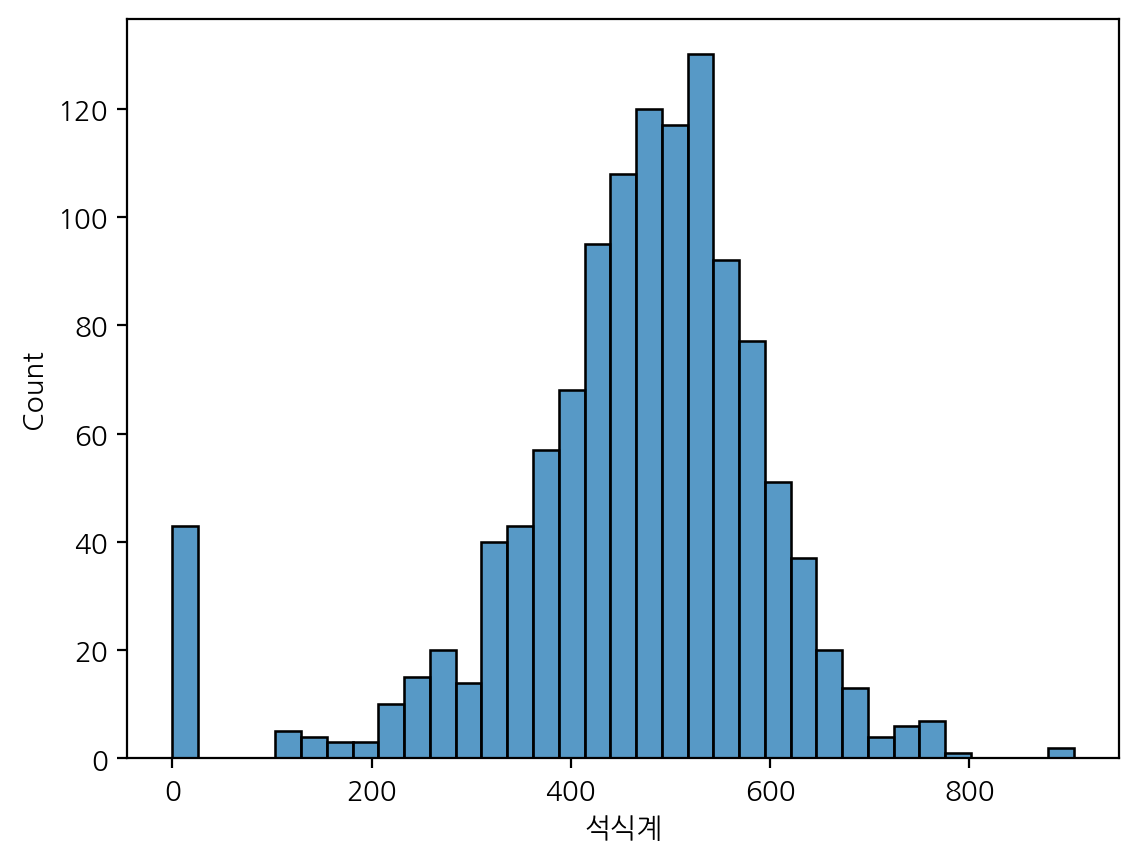

In [12]:
# 예측값 중 하나인 석식계가 0명?
sns.histplot(data=train,x="석식계")

In [13]:
train[train["석식계"]==0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


## 데이터 전처리
    ** 주의! Test는 볼 수 없다는 가정하에 전처리 진행하기 **
    1) 석식메뉴 이상값 처리     
    2) 메뉴 text 전처리     
    3) 요일 숫자로 매핑
    4) 구내식당 이용 가능한 인원 수 파생변수 생성

> 석식메뉴 이상값 처리

In [14]:
train.loc[train["석식계"]==0,"석식메뉴"].unique()

array(['    *        ', '     *       ', '      자기계발의날      ',
       '      *자기계발의날*      ', '      가정의날      ',
       '쌀밥/잡곡밥 (쌀:국내산) 된장찌개  미니함박조림  계란말이  비름나물  포기김치 (김치:국내산) ',
       '쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국  고추잡채*꽃빵  계란찜  오이무침  포기김치 (김치:국내산) ',
       '      *      ', '            ', '    자기계발의날        ',
       '    자기개발의날        ', '    *  자기계발의날  *    ',
       '    *  자기개발의날  *    ', '   *  자기개발의날  *     ',
       ' ＜자기 계발의 날＞      '], dtype=object)

In [15]:
# 삭제할 수도 있으나, test에도 저런 값이 충분히 있을 수 있으므로 처리값으로 진행하기로 함
# 공통점 : 앞뒤 공백 제거후 '*' '' OR '의날' 단어 포함 

In [16]:
train["석식메뉴_new"] = train["석식메뉴"]

In [17]:
train.loc[(train["석식메뉴_new"].str.contains("의"))&(train["석식메뉴_new"].str.contains("날")),
          "석식메뉴_new"] = "기념일"

In [18]:
train["석식메뉴_new"] = train["석식메뉴_new"].str.strip()
train.loc[train["석식메뉴_new"].str[0] == "*", "석식메뉴_new"] = "기념일"

In [19]:
train.loc[train["석식메뉴_new"]=='', "석식메뉴_new"] = "기념일"

In [20]:
# 확인
train.loc[train["석식계"]==0,"석식메뉴_new"]

204                                                   기념일
224                                                   기념일
244                                                   기념일
262                                                   기념일
281                                                   기념일
306                                                   기념일
327                                                   기념일
346                                                   기념일
366                                                   기념일
392                                                   기념일
410     쌀밥/잡곡밥 (쌀:국내산) 된장찌개  미니함박조림  계란말이  비름나물  포기김치 ...
412                                                   기념일
424                                                   기념일
449                                                   기념일
468                                                   기념일
492                                                   기념일
502     쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국  고추잡채*꽃빵  계란찜  오이무침  포기김치...
510           

In [21]:
# Test도 적용

In [22]:
test["석식메뉴_new"] = test["석식메뉴"]

In [23]:
test.loc[(test["석식메뉴_new"].str.contains("의"))&(test["석식메뉴_new"].str.contains("날")),
          "석식메뉴_new"] = "기념일"

In [24]:
test["석식메뉴_new"] = test["석식메뉴_new"].str.strip()
test.loc[train["석식메뉴_new"].str[0] == "*", "석식메뉴_new"] = "기념일"

In [25]:
test.loc[test["석식메뉴_new"]=='', "석식메뉴_new"] = "기념일"

In [26]:
# 확인
test.loc[(test["석식메뉴_new"].str.contains("의"))&(test["석식메뉴_new"].str.contains("날")),
          "석식메뉴_new"]

Series([], Name: 석식메뉴_new, dtype: object)

In [27]:
test.loc[train["석식메뉴_new"].str[0] == "*", "석식메뉴_new"]

Series([], Name: 석식메뉴_new, dtype: object)

In [28]:
test.loc[test["석식메뉴_new"]=='', "석식메뉴_new"]

Series([], Name: 석식메뉴_new, dtype: object)

> 메뉴 text 전처리

**1) 중식 메뉴**

In [29]:
# Train

In [30]:
# 원산지 표시인 (--) 제거 
tmp = train["중식메뉴"].str.replace("\([^)]*\)","",regex=True)
tmp

0           쌀밥/잡곡밥  오징어찌개  쇠불고기  계란찜  청포묵무침  요구르트  포기김치  
1       쌀밥/잡곡밥  김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉...
2           카레덮밥  팽이장국  치킨핑거  쫄면야채무침  견과류조림  요구르트  포기김치  
3          쌀밥/잡곡밥  쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치  
4           쌀밥/잡곡밥  떡국  돈육씨앗강정  우엉잡채  청경채무침  요구르트  포기김치  
                              ...                        
1200    쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...
1201    쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...
1202    전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...
1203    쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...
1204    쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...
Name: 중식메뉴, Length: 1205, dtype: object

In [31]:
tmp2 = tmp.str.replace("/"," ",regex=False).str.replace("*"," ",regex=False).str.replace("\s+"," ",regex=True)
tmp2[1003]

'카레라이스 '

In [32]:
tmp2[1003] = '카레라이스 미소시루 감자만두 양념 애기새송이버섯볶음 골뱅이야채무침 포기김치 기타'

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer()
X = Tfidf.fit_transform(tmp2)
train_t_feature = Tfidf.get_feature_names_out()
train_t_feature.shape

(1615,)

In [34]:
X.toarray()[1][0:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.45315439, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
df_tmp = pd.DataFrame(X.toarray())

In [36]:
# (1) "중식_sum" feature 생성
#      값을 다 더해서 생소한 음식이 나왔는 지 체크하는 하는 feature을 생성
# (2) "중식_p1" ~ "중식_p5" feature 생성
#     PCA를 통해 특징 추출해서 사용하기

<AxesSubplot:xlabel='중식_sum', ylabel='Count'>

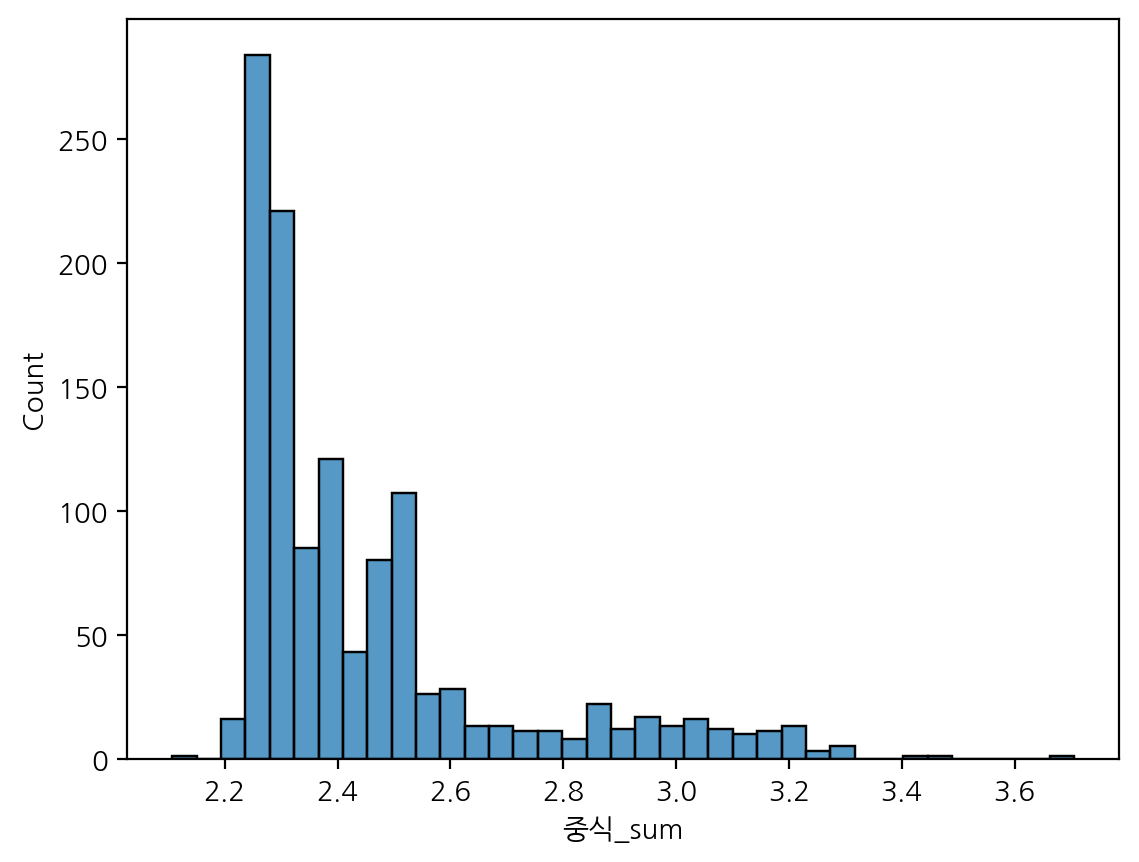

In [37]:
# (1) "중식_sum" feature 생성
train["중식_sum"] = df_tmp.sum(axis=1)
sns.histplot(data=train["중식_sum"])

In [38]:
# 처음 했을 때 동떨어지게 2보다 작은 값 발견 --> 1003번째
# 카레라이스 (쌀:국내산,돈육:국내 미소시루  감자만두*양념  애기새송이버섯볶음  골뱅이야채무침  포기김치 (김치:국내산)
# 위와 깉은 표기여서 오류가 났었음
# 해당 값만 따로 위에서 제대로 값 넣어줌
# df_tmp[df_tmp.sum(axis=1)<2]

In [39]:
# (2) "중식_p1" ~ "중식_p5" feature 생성
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
printcipalComponents = pca.fit_transform(df_tmp)

In [40]:
df_pca = pd.DataFrame(data=printcipalComponents, columns = ['중식_p1', '중식_p2', "중식_p3","중식_p4","중식_p5"])
df_pca

,중식_p1,중식_p2,중식_p3,중식_p4,중식_p5
0,0.031014,-0.009357,-0.001227,-0.036032,0.015366
1,-0.006988,0.055160,-0.021339,0.174346,0.004552
2,-0.183262,0.164744,0.051849,-0.114996,0.054300
3,0.070002,-0.010661,-0.063741,-0.024093,0.045288
4,0.033631,-0.014465,0.013816,-0.019118,-0.012562
...,...,...,...,...,...
1200,-0.228788,-0.277158,0.006642,0.076072,0.055227
1201,-0.170929,-0.166580,-0.001704,0.016017,0.020026
1202,-0.125495,-0.079783,0.016261,-0.011235,-0.000181
1203,-0.201953,-0.221092,0.000584,0.032230,-0.008841


In [41]:
train = pd.concat([train,df_pca],axis=1)

In [42]:
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,석식메뉴_new,중식_sum,중식_p1,중식_p2,중식_p3,중식_p4,중식_p5
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",2.45808,0.031014,-0.009357,-0.001227,-0.036032,0.015366


In [43]:
# Test
feature = train_t_feature.tolist()
feature

['d오리엔탈d',
 'la갈비구이',
 '가래떡구이',
 '가래떡돼지갈비찜',
 '가래떡츄러스',
 '가자미무조림',
 '가자미양념찜',
 '가자미엿장구이',
 '가자미엿장조림',
 '가자미유린기',
 '가자미카레튀김',
 '가자미튀김',
 '가지고추장무침',
 '가지구이',
 '가지나물',
 '가지나물무침',
 '가지무침',
 '가지볶음',
 '가지완자튀김',
 '가지찜',
 '가쯔오국',
 '가쯔오장국',
 '간장',
 '간장깻잎지',
 '간장돼지갈비찜',
 '간장두부조림',
 '간장마늘치킨',
 '간장양념',
 '간장찜닭',
 '간장치킨',
 '간장파닭',
 '갈릭돈가스',
 '갈릭돈까스',
 '갈릭버섯탕수',
 '갈릭순살치킨',
 '갈비만두',
 '갈비탕',
 '갈비통통만두',
 '갈치감자조림',
 '갈치구이',
 '갈치무조림',
 '갈치양념조림',
 '갈치조림',
 '감귤d',
 '감자고구마샐러드',
 '감자고추장찌개',
 '감자국',
 '감자그라탕',
 '감자만두',
 '감자범벅',
 '감자볶음',
 '감자비엔나볶음',
 '감자샐러드',
 '감자수제비국',
 '감자양파국',
 '감자전',
 '감자조림',
 '감자채볶음',
 '감자채전',
 '감자채카레볶음',
 '감자채파프리카볶음',
 '감자치즈구이',
 '감자프리타타',
 '갓김치',
 '강낭콩밥',
 '강된장',
 '강된장찌개',
 '강정소스',
 '개성감자만두',
 '개성식메밀부침개',
 '건강비빔밥',
 '건새우마늘쫑볶음',
 '건새우무국',
 '건새우무채국',
 '건새우미역국',
 '건새우아욱국',
 '건새우호박볶음',
 '건새우호박채전',
 '건취나물볶음',
 '건파래무침',
 '검은깨올방개묵무침',
 '검정콩밥',
 '검정콩조림',
 '겉절이김치',
 '견과류마카로니범벅',
 '견과류멸치볶음',
 '견과류샐러드',
 '견과류연근조림',
 '견과류조림',
 '견과쌈장',
 '경상도식소고기국',
 '계란',
 '계란국',
 '계란말이',
 '계란버섯장조림',
 '계란장조림',
 '계란찜',

In [44]:
def made_기타(lst, feature):
    t = lst.split()
    for i in range(len(t)):
        if t[i] not in feature:
            t[i]="기타"
    return " ".join(t)

In [45]:
# 원산지 표시인 (--) 제거 
tmp = test["중식메뉴"].str.replace("\([^)]*\)","",regex=True)
tmp2 = tmp.str.replace("/"," ",regex=False).str.replace("*"," ",regex=False).str.replace("\s+"," ",regex=True).str.strip()

In [46]:
for i in range(len(tmp2)):
    tmp2[i] = made_기타(tmp2[i],feature)

In [47]:
tmp2[0]

'쌀밥 흑미밥 찰현미밥 기타 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추샐러드 기타'

In [48]:
X = Tfidf.transform(tmp2)

df_tmp = pd.DataFrame(X.toarray())
df_tmp

,0,1,2,3,4,5,6,7,8,9,...,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.187417,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.150617,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.192563,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.184617,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.120210,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.145156,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [49]:
# (1) "중식_sum" feature 생성
test["중식_sum"] = df_tmp.sum(axis=1)

# (2) "중식_p1" ~ "중식_p5" feature 생성
printcipalComponents = pca.fit_transform(df_tmp)

df_pca = pd.DataFrame(data=printcipalComponents, columns = ['중식_p1', '중식_p2', "중식_p3","중식_p4","중식_p5"])
df_pca.head()

,중식_p1,중식_p2,중식_p3,중식_p4,중식_p5
0,0.042042,-0.121425,-0.005648,-0.013565,-0.044155
1,0.094883,0.136181,0.311506,-0.071081,0.088043
2,-0.115212,-0.069819,-0.004720,0.006430,-0.003801
3,0.023584,-0.122742,-0.003982,-0.005318,-0.025938
4,-0.161121,0.002855,0.008154,0.011278,-0.025116


<AxesSubplot:xlabel='중식_sum', ylabel='Count'>

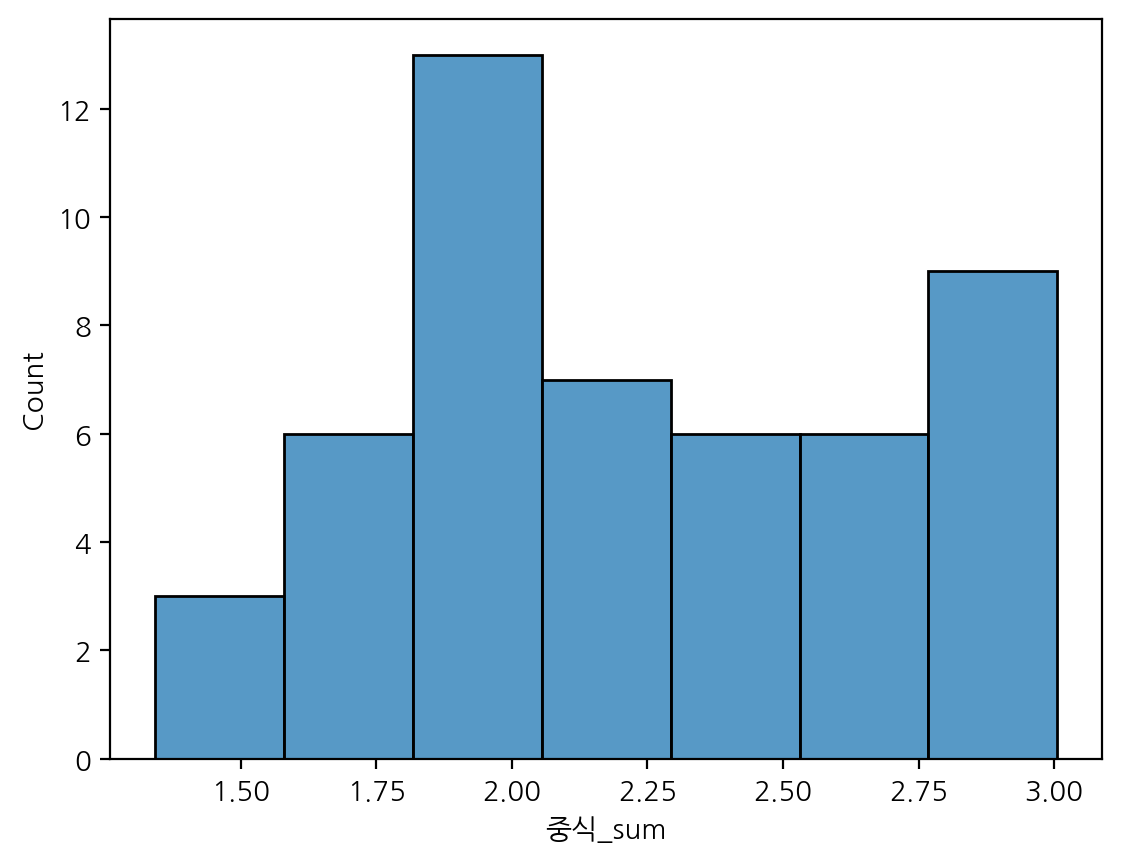

In [50]:
sns.histplot(data=test["중식_sum"])

In [51]:
test = pd.concat([test,df_pca],axis=1)

In [52]:
test.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,석식메뉴_new,중식_sum,중식_p1,중식_p2,중식_p3,중식_p4,중식_p5
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2.428719,0.042042,-0.121425,-0.005648,-0.013565,-0.044155


**1) 석식 메뉴**

In [53]:
# Train

In [54]:
# 원산지 표시인 (--) 제거 
tmp = train["석식메뉴_new"].str.replace("\([^)]*\)","",regex=True)
tmp2 = tmp.str.replace("/"," ",regex=False).str.replace("*"," ",regex=False).str.replace("\s+"," ",regex=True)
tmp2

0                 쌀밥 잡곡밥 육개장 자반고등어구이 두부조림 건파래무침 포기김치 
1                   콩나물밥 양념장 어묵국 유산슬 아삭고추무침 바나나 포기김치 
2               쌀밥 잡곡밥 청국장찌개 황태양념구이 고기전 새송이버섯볶음 포기김치 
3                   미니김밥 겨자장 우동 멕시칸샐러드 군고구마 무피클 포기김치 
4               쌀밥 잡곡밥 차돌박이찌개 닭갈비 감자소세지볶음 콩나물무침 포기김치 
                            ...                      
1200    김치볶음밥 미니쫄우동 맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치
1201           흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치
1202       흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치 겉절이김치
1203           흑미밥 열무된장국 장어강정 데리야끼소스 깻잎쌈 생강채 오이선 포기김치
1204             할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기
Name: 석식메뉴_new, Length: 1205, dtype: object

In [55]:
tmp2[956] = '카레라이스 맑은국  생선까스*탈탈소스  멕시칸샐러드 오복지무침  포기김치'

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer()
X = Tfidf.fit_transform(tmp2)
Tfidf.get_feature_names_out()[100:150]

array(['고등어구이', '고등어김치말이', '고등어김치찜', '고등어양념구이', '고등어자반찜', '고등어조림',
       '고등어카레구이', '고르곤졸라피자', '고추', '고추가루', '고추잡채', '고추잡채덮밥', '고추장멸치볶음',
       '고추장불고기', '고추장찌개', '고추지무침', '고추짜장', '고추튀김', '고춧잎무침', '곤드레밥',
       '골뱅이무침', '골뱅이채소무침', '과일', '과일샐러드', '과일요거트샐러드', '과일주스', '과일탕수육',
       '과일플레인샐러드', '교자만두', '구슬떡볶이', '구운채소', '구이김', '국물떡볶이', '군고구마', '군만두',
       '굴미역국', '굴비구이', '굴소스볶음밥', '굴소스파인볶음밥', '굴소스해물볶음밥', '궁중떡볶음', '궁중떡볶이',
       '궁중떡찜', '그린빈베이컨볶음', '그린요거트샐러드', '근대고추장무침', '근대국', '근대나물무침',
       '근대된장국', '근대두부된장국'], dtype=object)

In [57]:
df_tmp = pd.DataFrame(X.toarray())

<AxesSubplot:xlabel='석식_sum', ylabel='Count'>

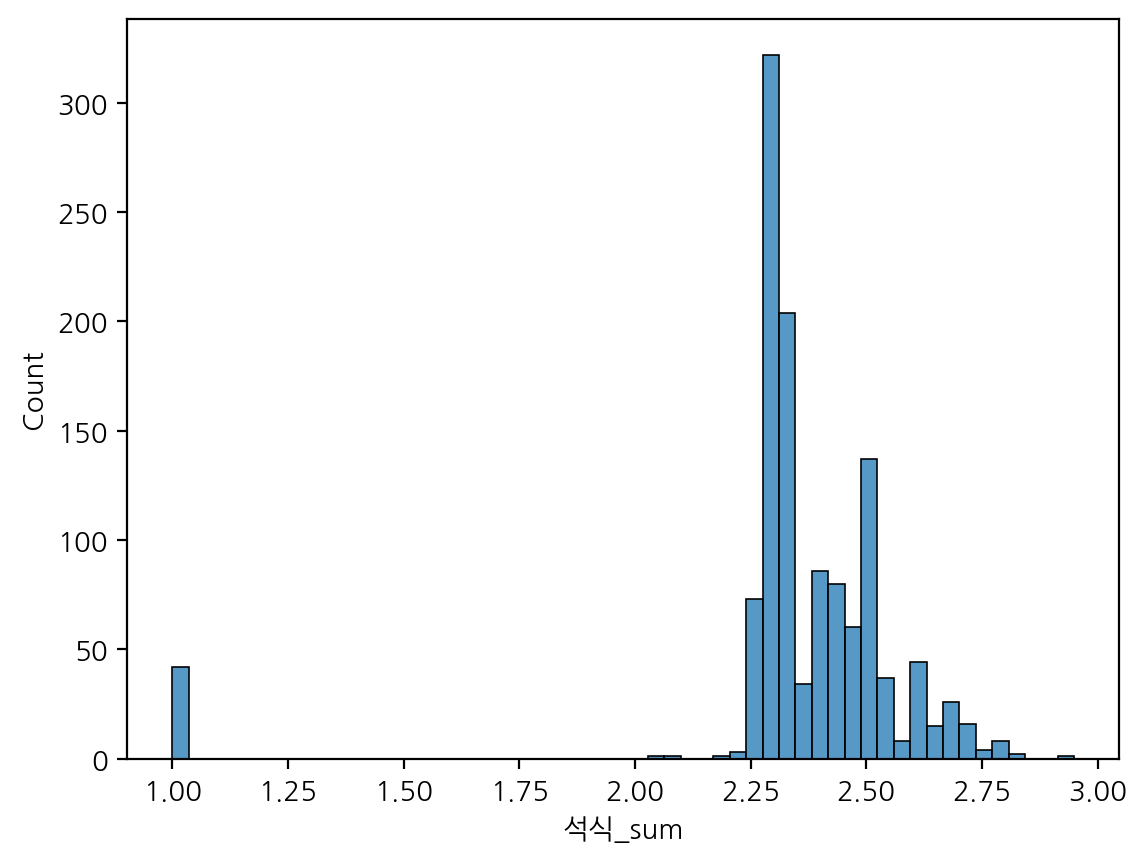

In [58]:
# (1) "중식_sum" feature 생성
train["석식_sum"] = df_tmp.sum(axis=1)
sns.histplot(data=train["석식_sum"])

In [59]:
train.loc[train["석식_sum"]<2,"석식메뉴_new"].unique()

array(['기념일'], dtype=object)

In [60]:
# (2) "중식_p1" ~ "중식_p5" feature 생성
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
printcipalComponents = pca.fit_transform(df_tmp)

In [61]:
df_pca = pd.DataFrame(data=printcipalComponents, columns = ['석식_p1', '석식_p2', "석식_p3","석식_p4","석식_p5"])

In [62]:
df_pca.head()

,석식_p1,석식_p2,석식_p3,석식_p4,석식_p5
0,-0.048314,-0.106702,0.044924,-0.041943,0.019229
1,-0.029219,0.032947,-0.034456,-0.020533,-0.042674
2,-0.055962,-0.147462,0.056729,-0.027872,0.014099
3,-0.022742,0.183609,-0.030821,-0.157751,0.096130
4,-0.052300,-0.127604,0.061315,-0.053516,0.003411


In [63]:
train = pd.concat([train,df_pca],axis=1)

In [64]:
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식_p2,중식_p3,중식_p4,중식_p5,석식_sum,석식_p1,석식_p2,석식_p3,석식_p4,석식_p5
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,-0.009357,-0.001227,-0.036032,0.015366,2.299416,-0.048314,-0.106702,0.044924,-0.041943,0.019229


In [65]:
# Test

In [66]:
# Test
feature = Tfidf.get_feature_names_out().tolist()
feature

['가래떡오븐구이',
 '가쓰오장국',
 '가자미구이',
 '가자미양념조림',
 '가자미양념찜',
 '가자미엿장구이',
 '가자미찜',
 '가자미카레튀김',
 '가자미튀김',
 '가지나물',
 '가지된장무침',
 '가지마파두부',
 '가지무침',
 '가지탕수',
 '가쯔오국',
 '가쯔오장국',
 '간장',
 '간장계란장',
 '간장깻잎지',
 '간장마늘치킨',
 '간장불고기',
 '간장찜닭',
 '간장치킨',
 '갈릭파닭',
 '갈비만두',
 '갈치구이',
 '갈치무조림',
 '갈치양념조림',
 '갈치조림',
 '갈치카레구이',
 '갈치튀김',
 '감자간장조림',
 '감자고추장찌개',
 '감자국',
 '감자만두',
 '감자만두국',
 '감자버터구이',
 '감자범벅',
 '감자비엔나볶음',
 '감자샐러드',
 '감자소세지볶음',
 '감자양념조림',
 '감자양파국',
 '감자전',
 '감자찌개',
 '감자채볶음',
 '감자채전',
 '감자채카레볶음',
 '감자채파프리카볶음',
 '감자채햄볶음',
 '감자치즈구이',
 '감자치즈오븐구이',
 '감자카레볶음',
 '감자튀김',
 '감자프리타타',
 '감자햄조림',
 '갓김치',
 '강된장',
 '개성감자만두',
 '건도토리묵파프리카볶음',
 '건새우마늘쫑볶음',
 '건새우아욱국',
 '건새우아욱된장국',
 '건새우호박채전',
 '건파래무침',
 '건파래볶음',
 '검정콩조림',
 '겉절이김치',
 '겨울초겉절이',
 '겨자장',
 '견과류조림',
 '계란',
 '계란국',
 '계란김밥',
 '계란떡볶이',
 '계란말이',
 '계란볶음밥',
 '계란야채말이',
 '계란장조림',
 '계란찜',
 '계란파국',
 '계란후라이',
 '고갈비구이',
 '고구마그라탕',
 '고구마까스',
 '고구마떡볶이',
 '고구마맛탕',
 '고구마범벅',
 '고구마샐러드',
 '고구마순나물',
 '고구마순들깨볶음',
 '고구마순볶음',
 '고구마연근맛탕',
 '고구마오븐구이',
 '고구마치즈구이',
 '고구마치즈돈까스',
 '고구마튀김',

In [67]:
def made_기타(lst, feature):
    t = lst.split()
    for i in range(len(t)):
        if t[i] not in feature:
            t[i]="기타"
    return " ".join(t)

In [68]:
# 원산지 표시인 (--) 제거 
tmp = test["석식메뉴_new"].str.replace("\([^)]*\)","",regex=True)
tmp2 = tmp.str.replace("/"," ",regex=False).str.replace("*"," ",regex=False).str.replace("\s+"," ",regex=True).str.strip()

In [69]:
for i in range(len(tmp2)):
    tmp2[i] = made_기타(tmp2[i],feature)

In [70]:
X = Tfidf.transform(tmp2)

df_tmp = pd.DataFrame(X.toarray())
df_tmp

,0,1,2,3,4,5,6,7,8,9,...,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.428412,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.447730,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.447730,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.284268,0.0,0.0,0.0,0.0
5,0.0,0.451031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.364034,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.940122,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.432554,0.0,0.0,0.0,0.0


In [71]:
# (1) "중식_sum" feature 생성
test["석식_sum"] = df_tmp.sum(axis=1)

# (2) "중식_p1" ~ "중식_p5" feature 생성
printcipalComponents = pca.fit_transform(df_tmp)

df_pca = pd.DataFrame(data=printcipalComponents, columns = ['석식_p1', '석식_p2', "석식_p3","석식_p4","석식_p5"])
df_pca.head()

,석식_p1,석식_p2,석식_p3,석식_p4,석식_p5
0,0.220545,-0.059734,-0.051102,-0.002912,-0.001251
1,-0.356150,0.193604,-0.256366,0.433849,-0.219245
2,0.238917,-0.035080,-0.030871,-0.025701,-0.009112
3,0.240903,-0.042251,-0.025678,-0.008436,-0.038975
4,0.037642,-0.033210,-0.068251,0.031327,-0.048739


<AxesSubplot:xlabel='석식_sum', ylabel='Count'>

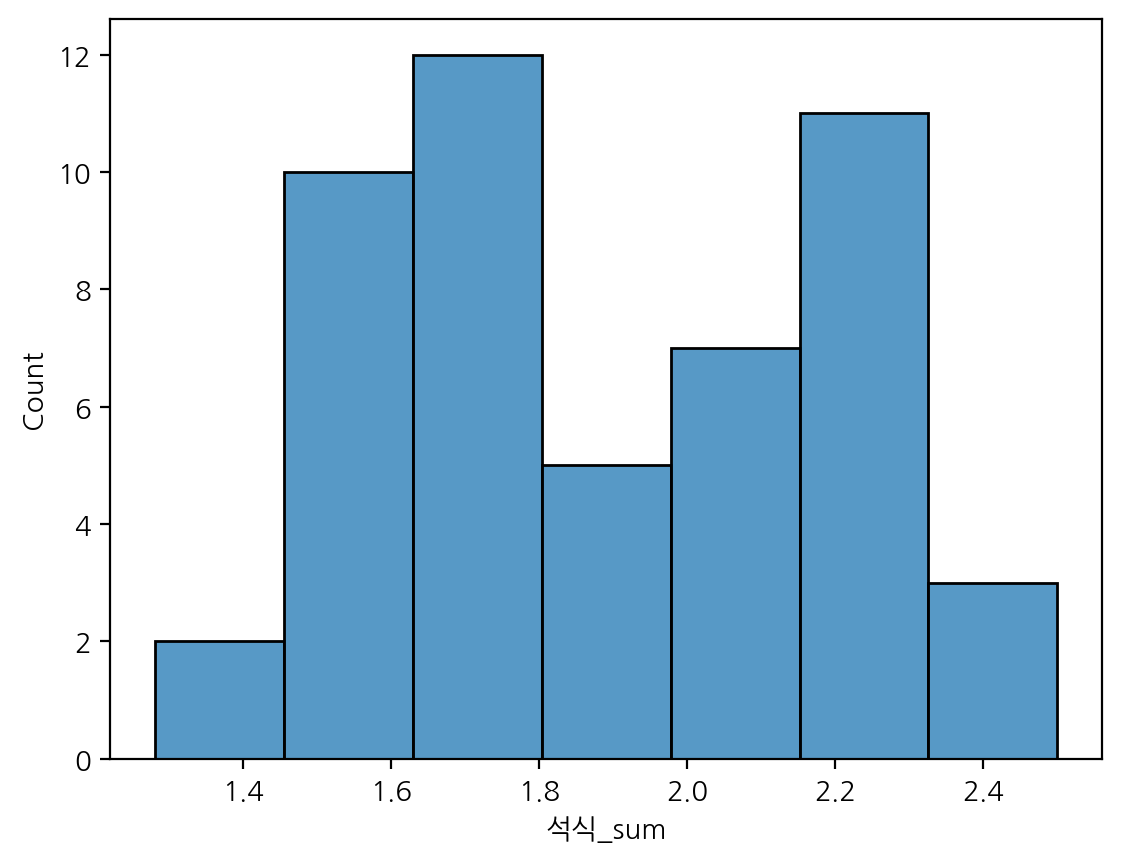

In [72]:
sns.histplot(data=test["석식_sum"])

In [73]:
test = pd.concat([test,df_pca],axis=1)

In [74]:
test.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식_p2,중식_p3,중식_p4,중식_p5,석식_sum,석식_p1,석식_p2,석식_p3,석식_p4,석식_p5
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,...,-0.121425,-0.005648,-0.013565,-0.044155,1.473866,0.220545,-0.059734,-0.051102,-0.002912,-0.001251


>  구내식당 이용 가능한 인원 수 파생변수 생성

In [75]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '석식메뉴_new',
       '중식_sum', '중식_p1', '중식_p2', '중식_p3', '중식_p4', '중식_p5', '석식_sum',
       '석식_p1', '석식_p2', '석식_p3', '석식_p4', '석식_p5'],
      dtype='object')

In [76]:
train["회사내인원"]=train["본사정원수"]-train["본사휴가자수"]-train["본사출장자수"]-train["현본사소속재택근무자수"]
test["회사내인원"]=test["본사정원수"]-test["본사휴가자수"]-test["본사출장자수"]-test["현본사소속재택근무자수"]

## EDA

array([[<AxesSubplot:title={'center':'본사정원수'}>,
        <AxesSubplot:title={'center':'본사휴가자수'}>,
        <AxesSubplot:title={'center':'본사출장자수'}>,
        <AxesSubplot:title={'center':'본사시간외근무명령서승인건수'}>],
       [<AxesSubplot:title={'center':'현본사소속재택근무자수'}>,
        <AxesSubplot:title={'center':'중식계'}>,
        <AxesSubplot:title={'center':'석식계'}>,
        <AxesSubplot:title={'center':'중식_sum'}>],
       [<AxesSubplot:title={'center':'중식_p1'}>,
        <AxesSubplot:title={'center':'중식_p2'}>,
        <AxesSubplot:title={'center':'중식_p3'}>,
        <AxesSubplot:title={'center':'중식_p4'}>],
       [<AxesSubplot:title={'center':'중식_p5'}>,
        <AxesSubplot:title={'center':'석식_sum'}>,
        <AxesSubplot:title={'center':'석식_p1'}>,
        <AxesSubplot:title={'center':'석식_p2'}>],
       [<AxesSubplot:title={'center':'석식_p3'}>,
        <AxesSubplot:title={'center':'석식_p4'}>,
        <AxesSubplot:title={'center':'석식_p5'}>,
        <AxesSubplot:title={'center':'회사내인원'}>]], dtype=object)

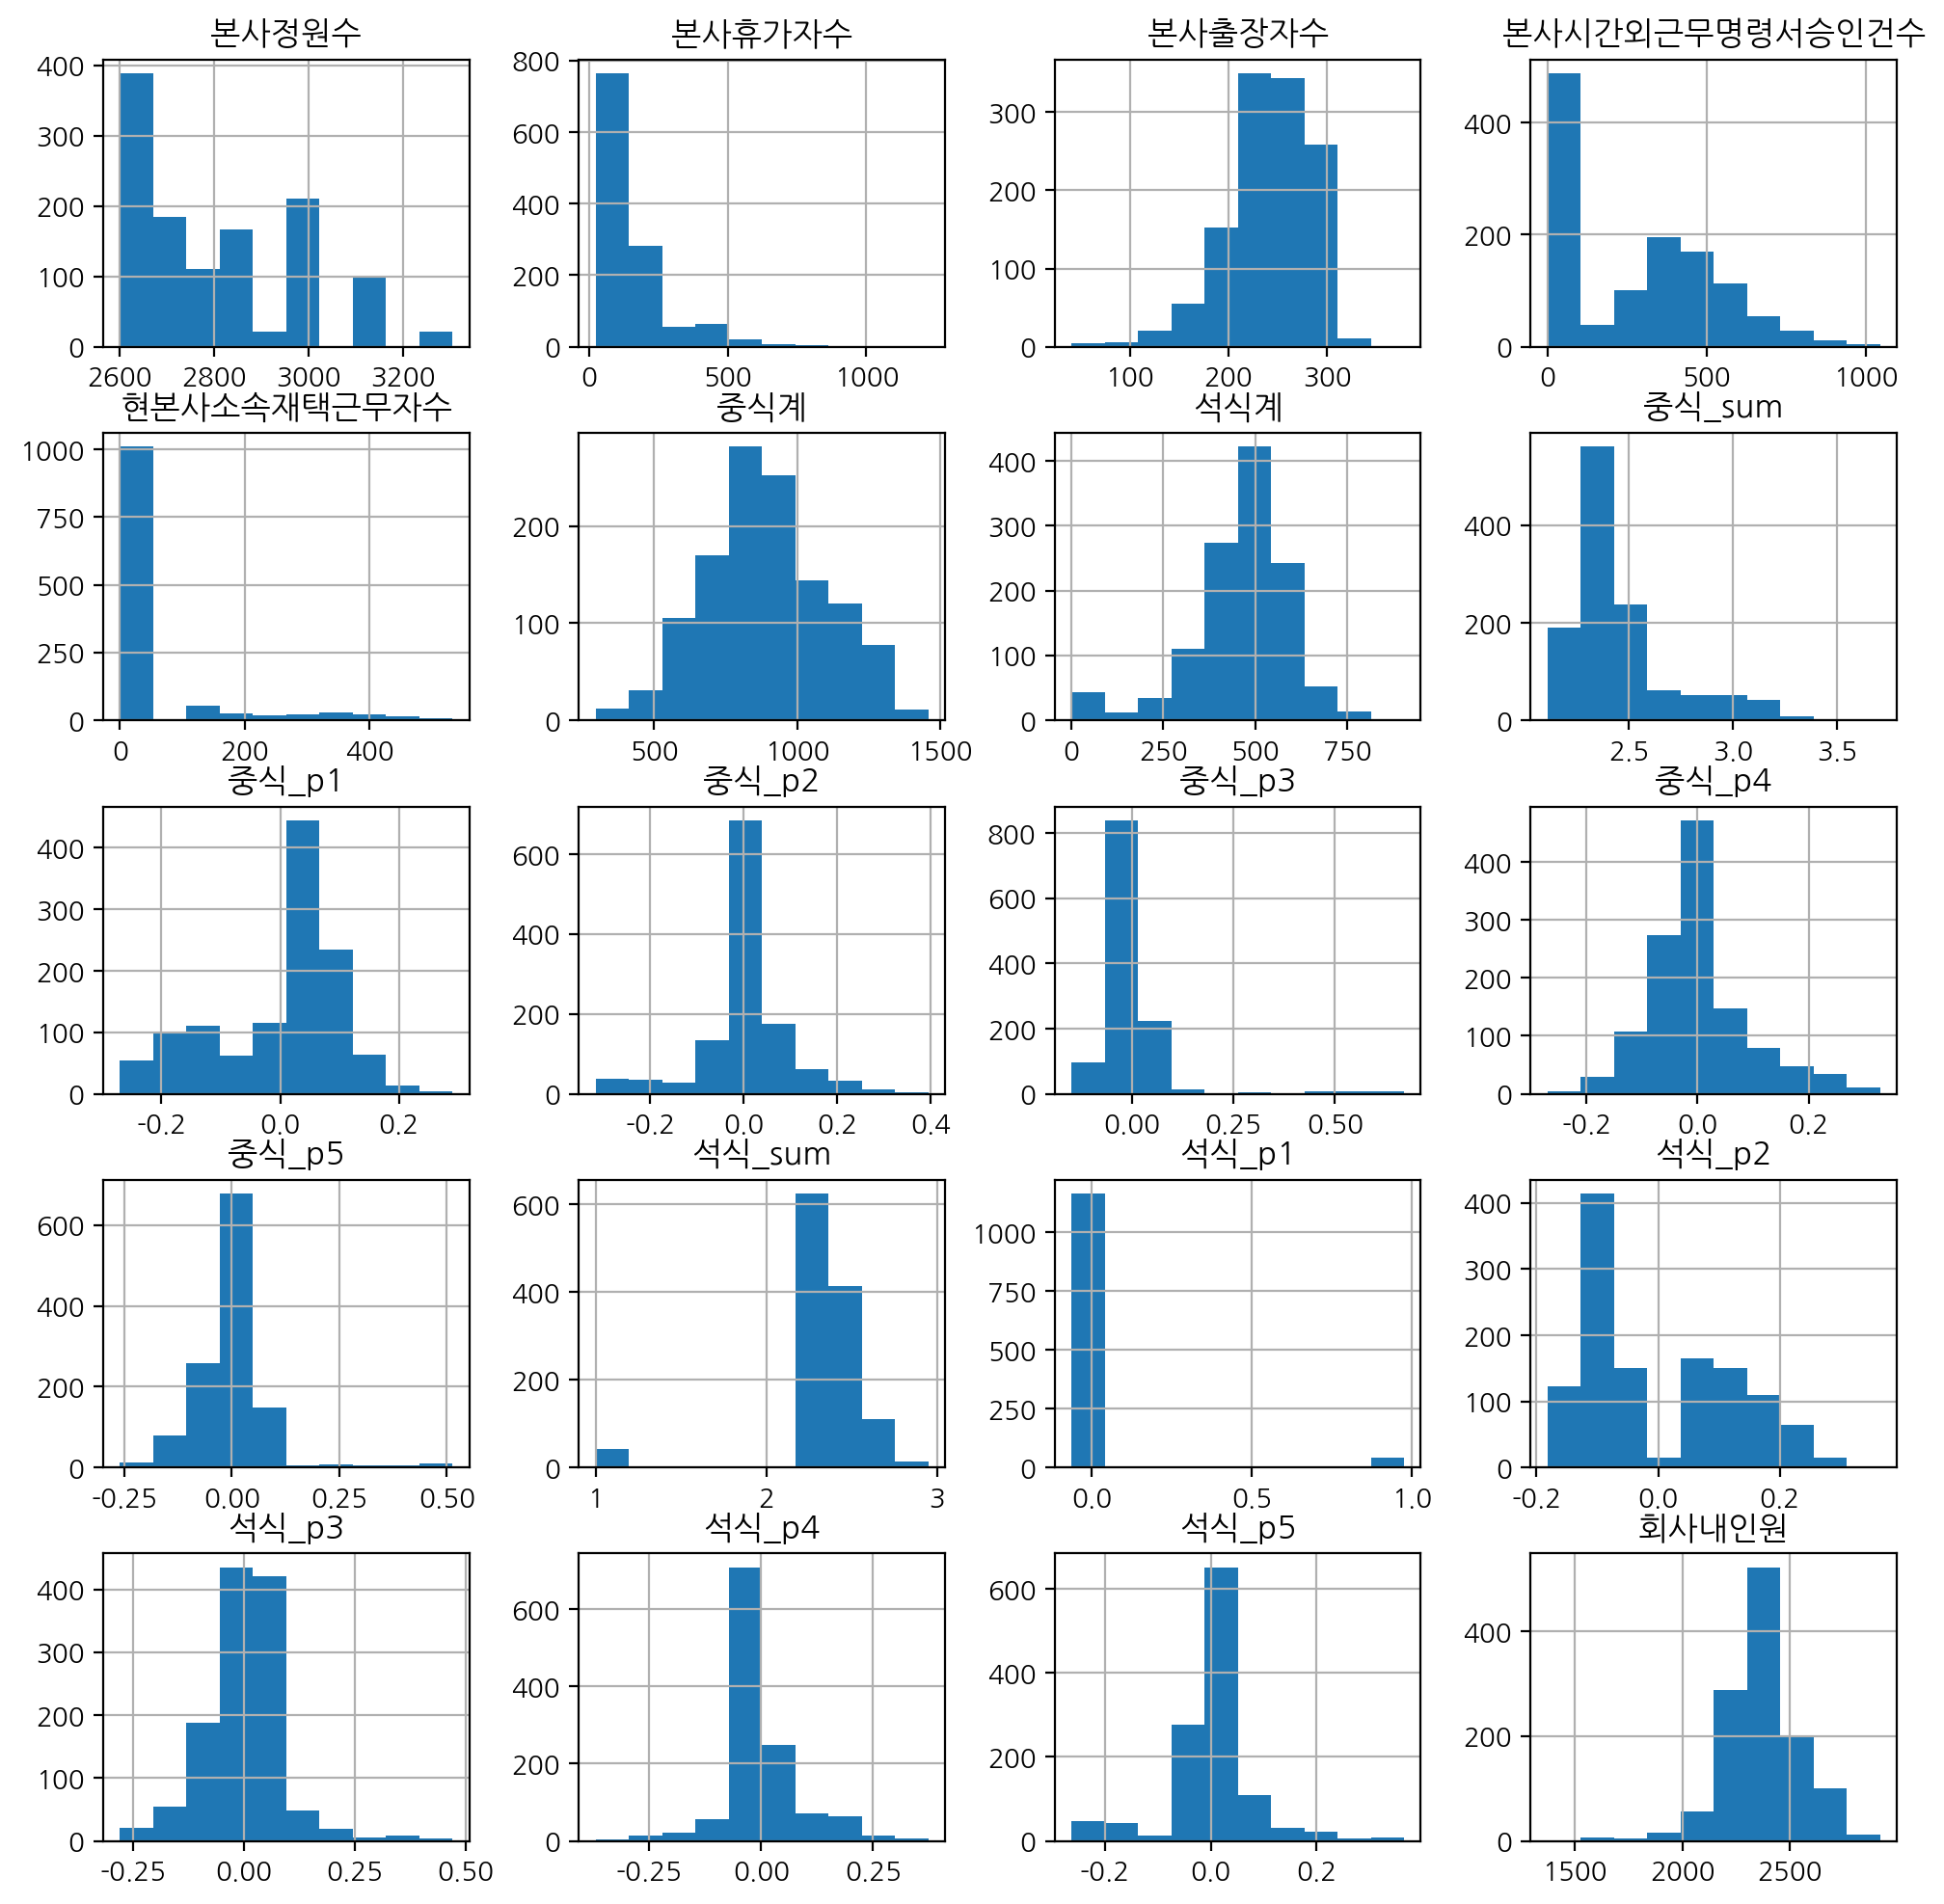

In [77]:
train.hist(figsize=(12,12))

In [78]:
test.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '석식메뉴_new', '중식_sum', '중식_p1',
       '중식_p2', '중식_p3', '중식_p4', '중식_p5', '석식_sum', '석식_p1', '석식_p2', '석식_p3',
       '석식_p4', '석식_p5', '회사내인원'],
      dtype='object')

In [79]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '석식메뉴_new',
       '중식_sum', '중식_p1', '중식_p2', '중식_p3', '중식_p4', '중식_p5', '석식_sum',
       '석식_p1', '석식_p2', '석식_p3', '석식_p4', '석식_p5', '회사내인원'],
      dtype='object')

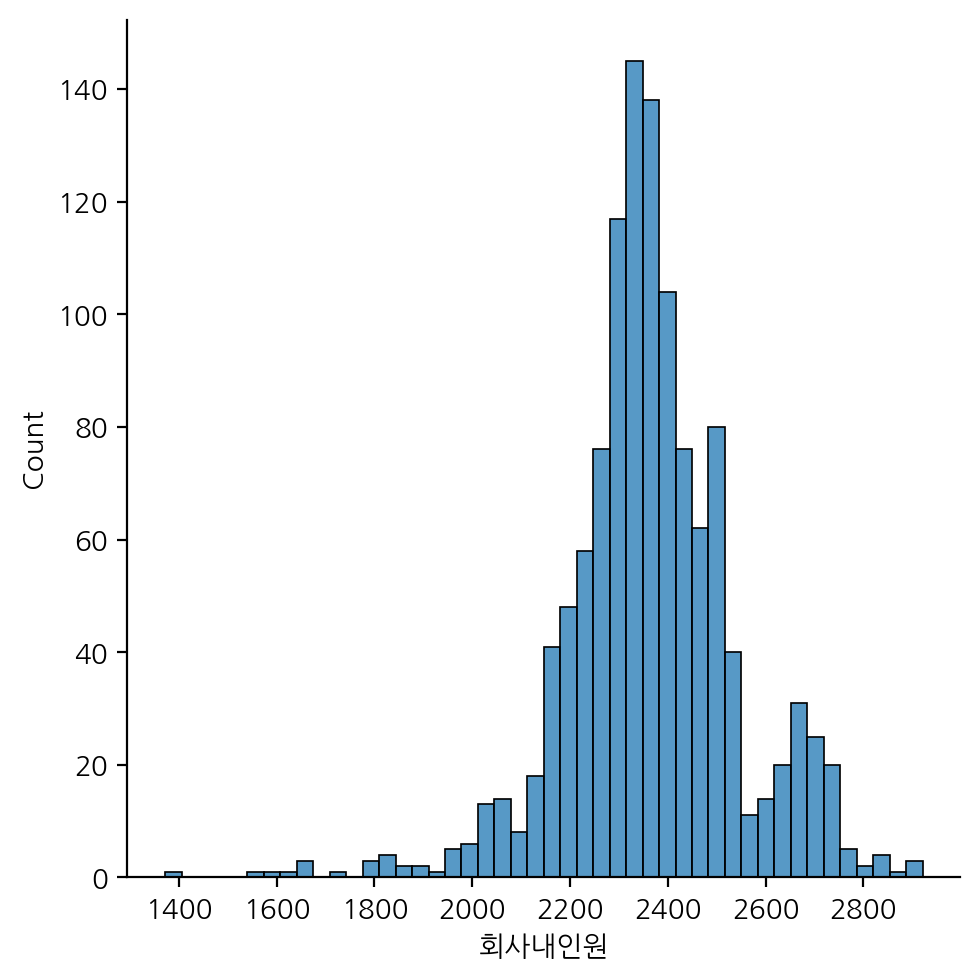

In [80]:
sns.displot(train["회사내인원"])

<AxesSubplot:xlabel='회사내인원', ylabel='중식계'>

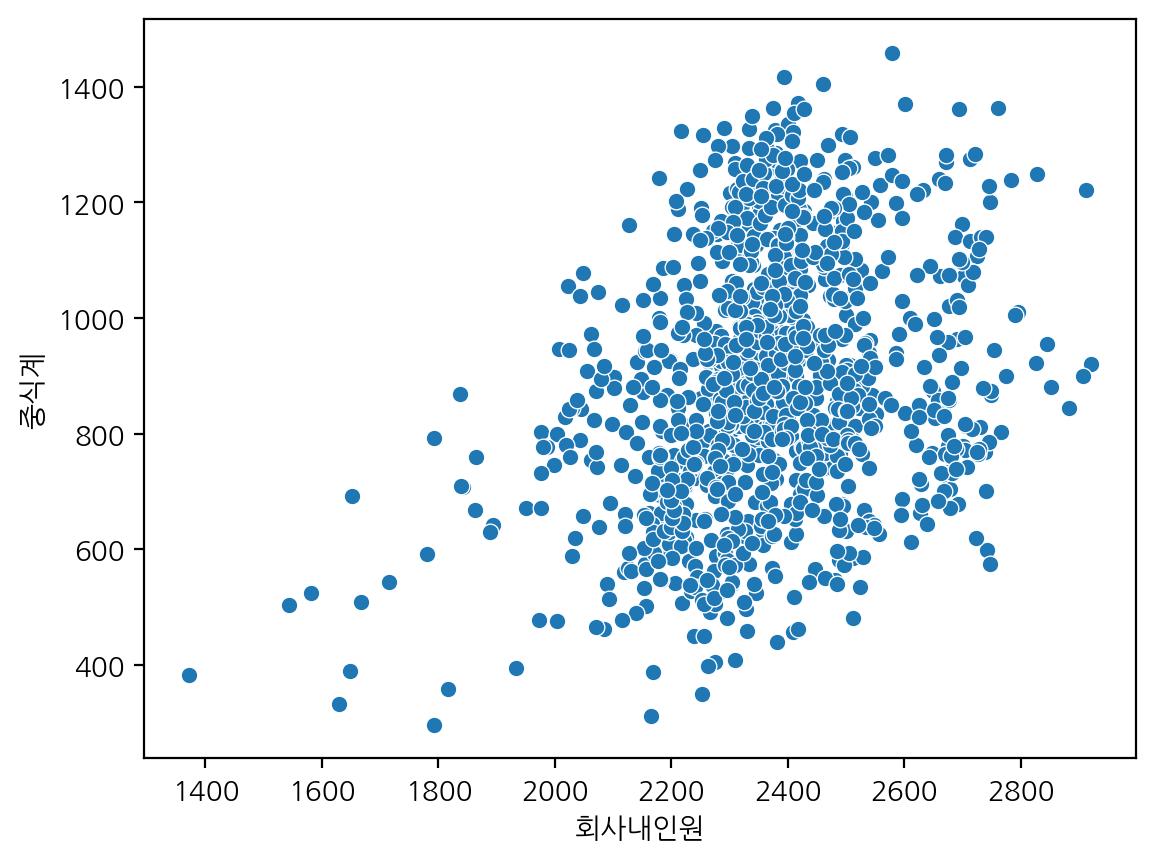

In [81]:
sns.scatterplot(data=train,x="회사내인원",y="중식계")

<AxesSubplot:xlabel='회사내인원', ylabel='석식계'>

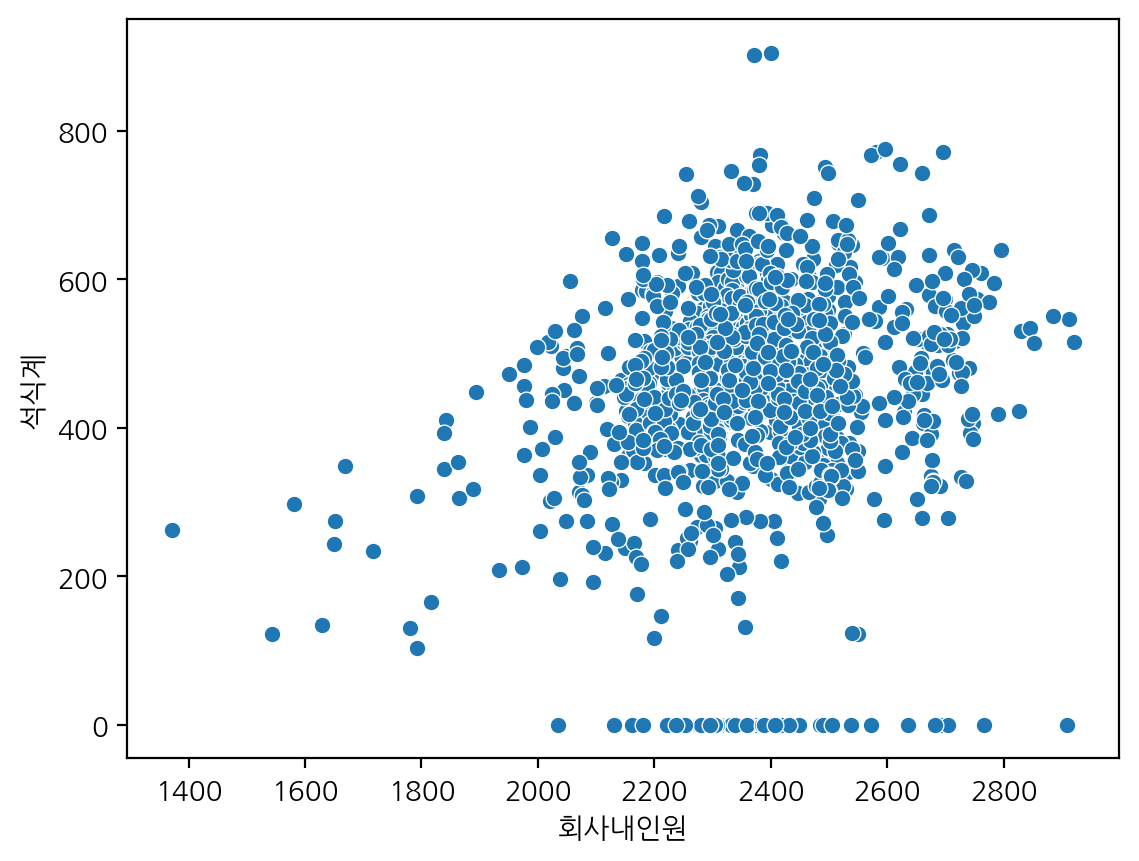

In [82]:
sns.scatterplot(data=train,x="회사내인원",y="석식계")

In [83]:
train_cor = train[['석식_p1', '석식_p2', '석식_p3', '석식_p4', '석식_p5','석식계']].corr()

<AxesSubplot:>

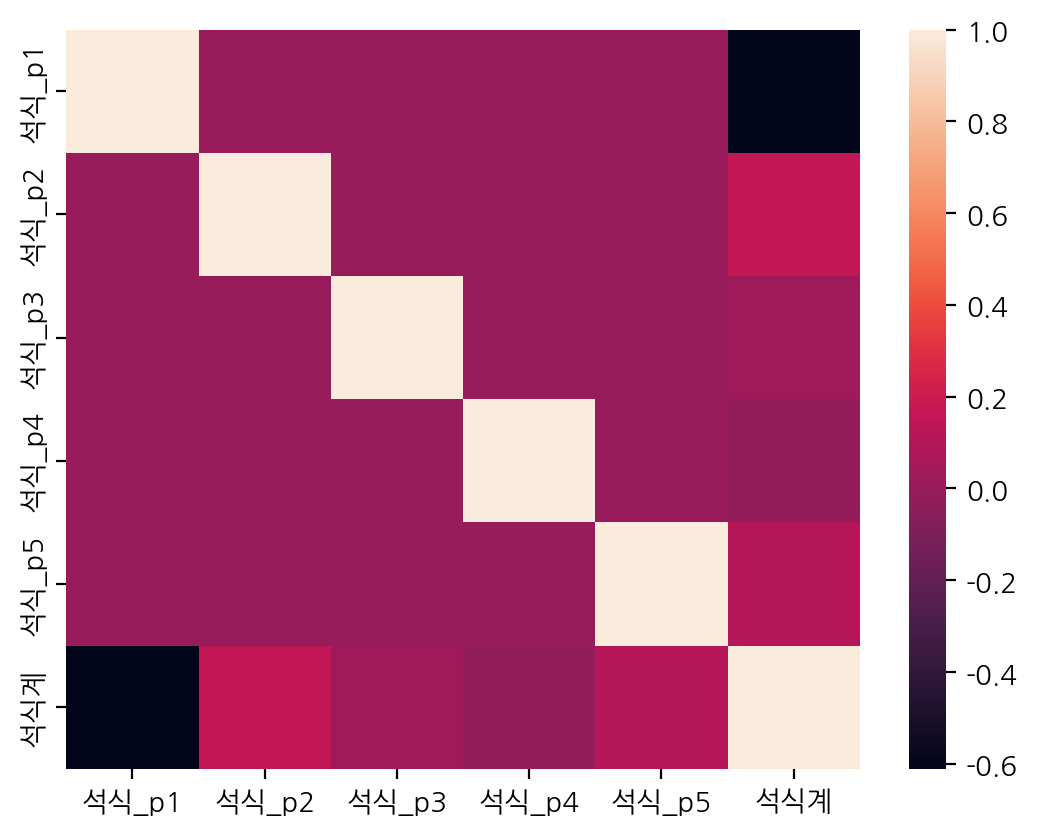

In [84]:
sns.heatmap(train_cor)

In [85]:
train_cor = train[['중식_p1', '중식_p2', '중식_p3', '중식_p4', '중식_p5','중식계']].corr()

<AxesSubplot:>

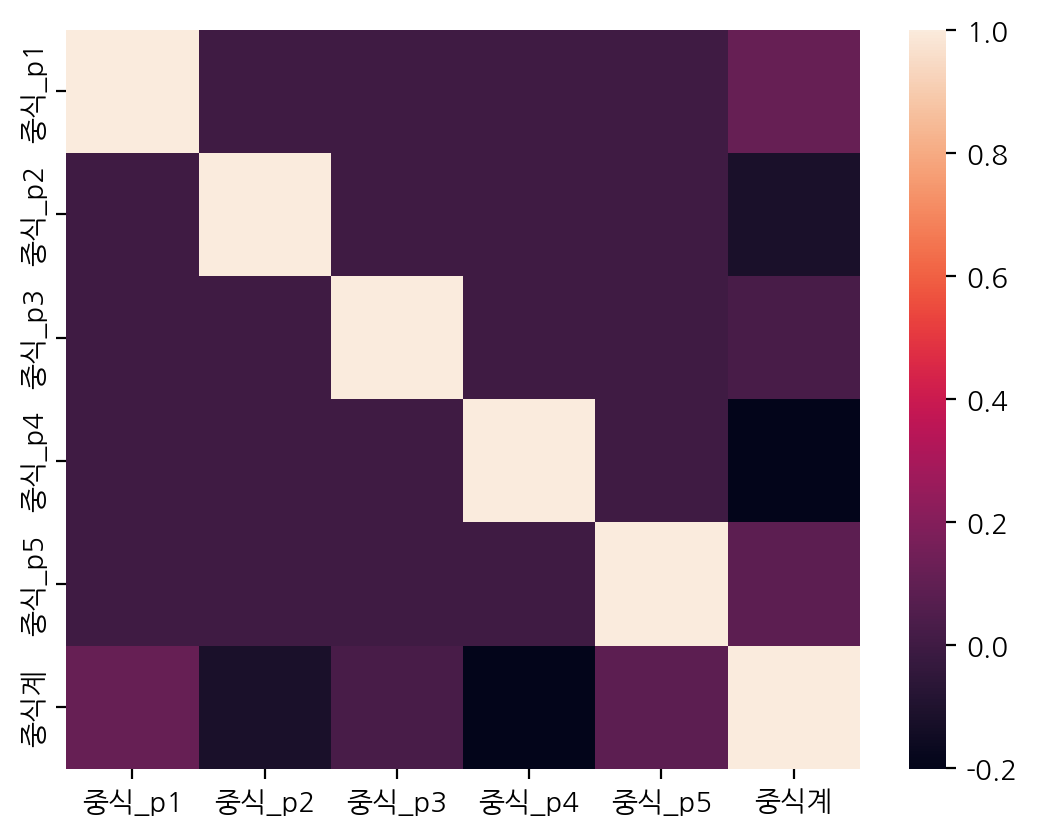

In [86]:
sns.heatmap(train_cor)

<AxesSubplot:xlabel='요일', ylabel='중식계'>

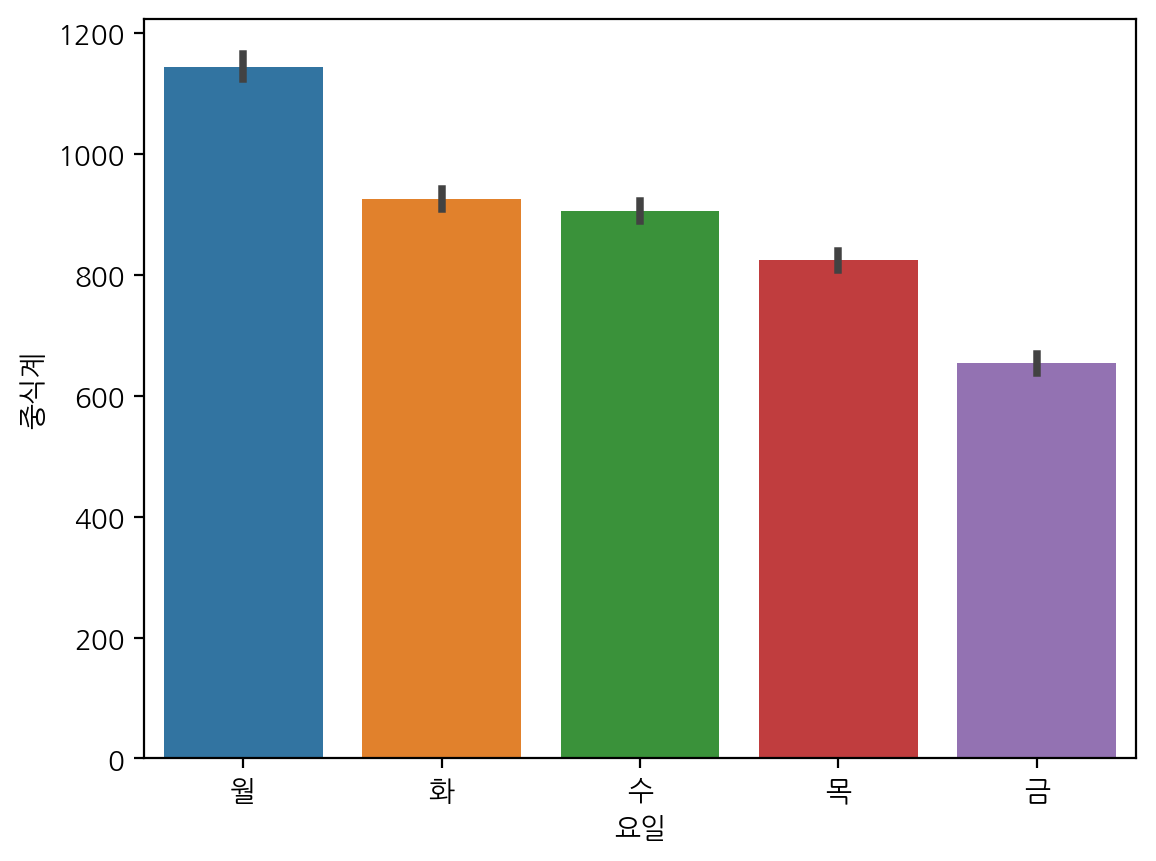

In [87]:
sns.barplot(data=train, x="요일",y="중식계")
# 요일 유의미

<AxesSubplot:xlabel='요일', ylabel='석식계'>

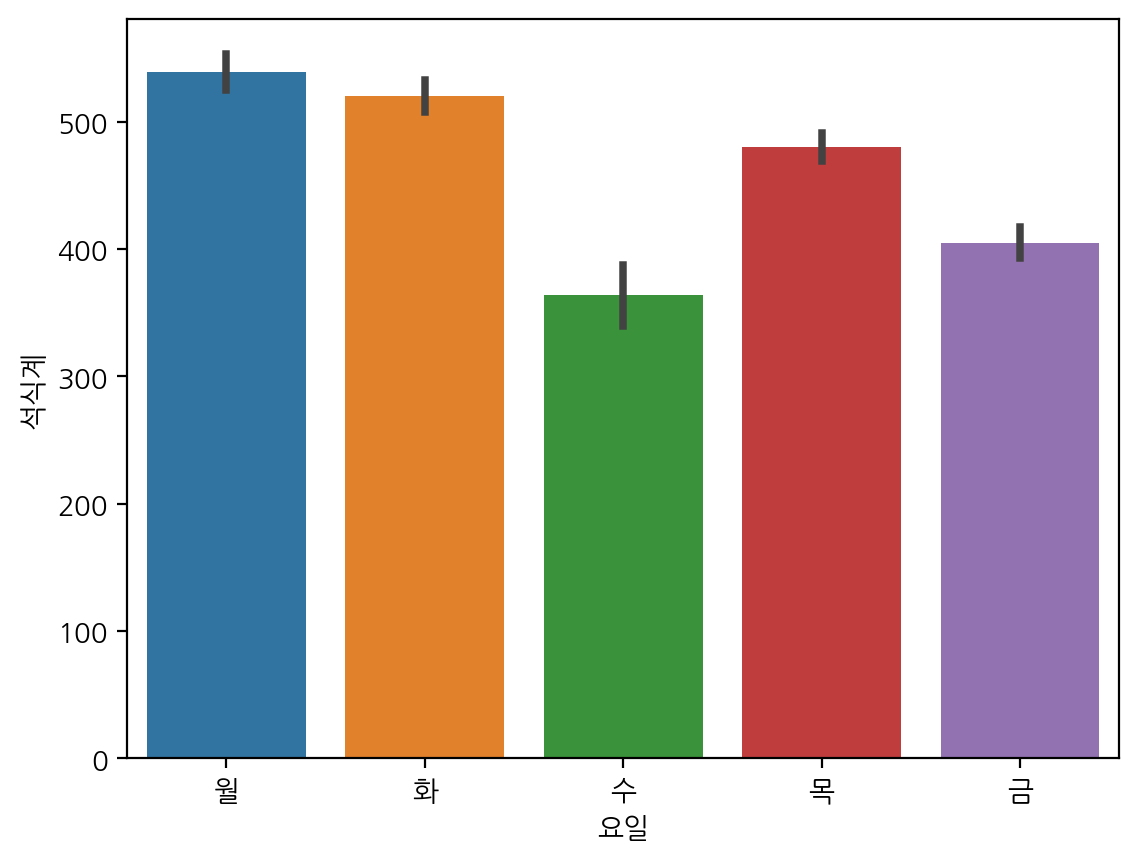

In [88]:
sns.barplot(data=train, x="요일",y="석식계")

<AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='석식계'>

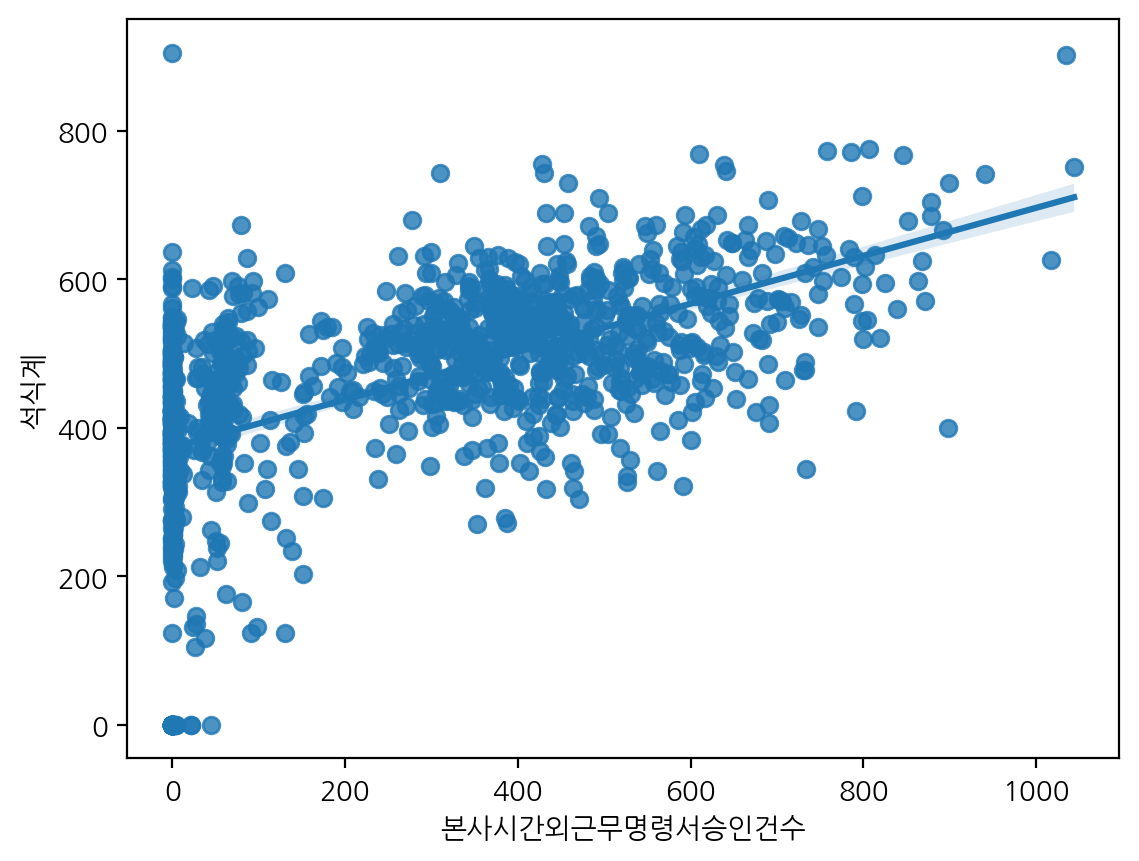

In [89]:
sns.regplot(data=train,x="본사시간외근무명령서승인건수",y="석식계")

<AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='중식계'>

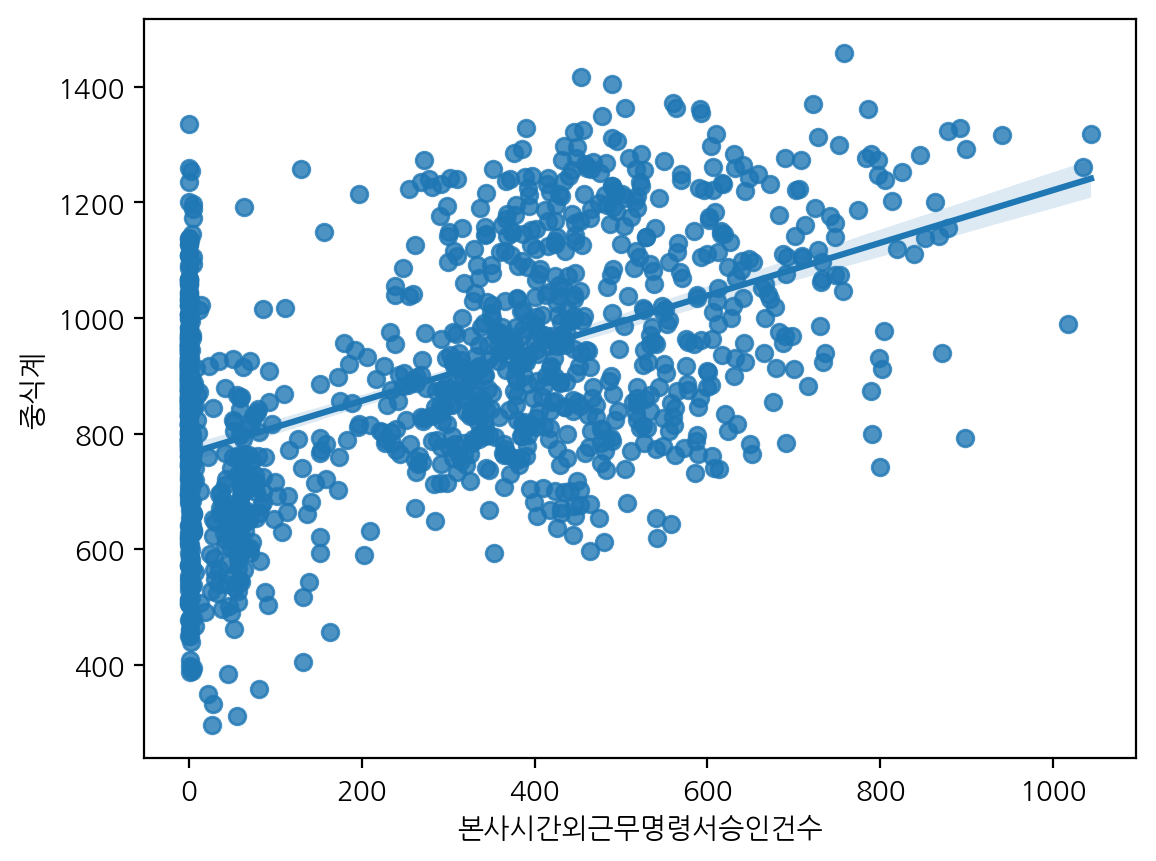

In [90]:
sns.regplot(data=train,x="본사시간외근무명령서승인건수",y="중식계")

EDA 후 선택할 feature
- 요일
- pca 결과물들 
- 본사시간외근무명령서승인건수
- 회사내인원

> 요일 one_hot_encoding

In [91]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
train_요일 = enc.fit_transform(train["요일"].array.reshape(-1, 1))
test_요일 = enc.transform(test["요일"].array.reshape(-1, 1))

In [92]:
enc.get_feature_names_out()

array(['x0_금', 'x0_목', 'x0_수', 'x0_월', 'x0_화'], dtype=object)

In [93]:
df_요일 = pd.DataFrame(train_요일.toarray(),columns=["요일1","요일2","요일3","요일4","요일5"])

In [94]:
train = pd.concat([train,df_요일],axis=1)

In [95]:
df_요일 = pd.DataFrame(test_요일.toarray(),columns=["요일1","요일2","요일3","요일4","요일5"])

In [96]:
test = pd.concat([test,df_요일],axis=1)

## Train 이상치 행 제거

In [97]:
drop_index = train[train["석식메뉴_new"]=="기념일"].index

In [98]:
train = train.drop(labels=drop_index)

## feature 선택

In [204]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '석식메뉴_new',
       '중식_sum', '중식_p1', '중식_p2', '중식_p3', '중식_p4', '중식_p5', '석식_sum',
       '석식_p1', '석식_p2', '석식_p3', '석식_p4', '석식_p5', '회사내인원', '요일1', '요일2',
       '요일3', '요일4', '요일5'],
      dtype='object')

In [230]:
x_train1 = train[[ "요일1","요일2","요일3","요일4","요일5",
                  '본사정원수', '본사휴가자수', '본사출장자수',
                '중식_p1', '중식_p2','중식_p3','중식_p4','중식_p5',
                 '본사시간외근무명령서승인건수', '회사내인원']]
x_train2 = train[["요일1","요일2","요일3","요일4","요일5",
                  '본사정원수', '본사휴가자수', '본사출장자수',
                '석식_p1', '석식_p2','석식_p3','석식_p4','석식_p5',
                 '본사시간외근무명령서승인건수', '회사내인원']]

y1_train = train['중식계']
y2_train = train['석식계']

x_test1 = test[["요일1","요일2","요일3","요일4","요일5",
                '본사정원수', '본사휴가자수', '본사출장자수',
                '중식_p1', '중식_p2','중식_p3','중식_p4','중식_p5',
                 '본사시간외근무명령서승인건수', '회사내인원']]
x_test2 = test[[ "요일1","요일2","요일3","요일4","요일5",
                '본사정원수', '본사휴가자수', '본사출장자수',
                '석식_p1', '석식_p2','석식_p3','석식_p4','석식_p5',
                '본사시간외근무명령서승인건수','회사내인원']]

## Model 생성 및 학습

In [206]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# from xgboost import XGBRegressor

# param = {
#     'max_depth':[2,3,4],
#     'n_estimators':range(300,600,100),
#     'colsample_bytree':[0.5,0.7,1],
#     'colsample_bylevel':[0.5,0.7,1],
# }
# model = xgb.XGBRegressor()
# grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
#                            scoring='neg_mean_squared_error',
#                            n_jobs=-1)

# grid_search.fit(x_train1, y1_train)
# print(grid_search.best_params_)

In [207]:
# param = {
#     'max_depth':[2,3,4],
#     'n_estimators':range(300,600,100),
#     'colsample_bytree':[0.5,0.7,1],
#     'colsample_bylevel':[0.5,0.7,1],
# }
# model = xgb.XGBRegressor()
# grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, 
#                            scoring='neg_mean_squared_error',
#                            n_jobs=-1)

# grid_search.fit(x_train2, y2_train)
# print(grid_search.best_params_)

In [208]:
# model1 = xgb.XGBRegressor(colsample_bylevel= 0.5, colsample_bytree= 0.5, max_depth= 2, n_estimators= 300)
# model2 = xgb.XGBRegressor(colsample_bylevel= 0.5, colsample_bytree= 0.5, max_depth= 2, n_estimators= 300)

In [209]:
# from sklearn.svm import SVR
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
# grid.fit(x_train1,y1_train)
# print(grid.best_estimator_)

In [210]:
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
# grid.fit(x_train2,y2_train)
# print(grid.best_estimator_)

In [211]:
# from sklearn.svm import SVR
# # model1 = SVR(C=10, gamma=0.1,kernel="rbf")
# model2 = SVR(C=10, gamma=0.1,kernel="rbf")

In [212]:
# from sklearn.model_selection import GridSearchCV
 
# param_grid = [
#         {'n_estimators': [3, 7, 10, 30], 'max_features': [2, 4, 6, 8]},
#         {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#     ]
# forest_reg = RandomForestRegressor()
 
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                            scoring='neg_mean_squared_error',
#                            return_train_score=True)
 
# grid_search.fit(x_train1,y1_train)
# print(grid_search.best_estimator_)

RandomForestRegressor(max_features=8, n_estimators=30)


In [188]:
# param_grid = [
#         {'n_estimators': [3, 7, 10, 30], 'max_features': [2, 4, 6, 8]},
#         {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#     ]
# forest_reg = RandomForestRegressor()
 
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                            scoring='neg_mean_squared_error',
#                            return_train_score=True)
 
# grid_search.fit(x_train2,y2_train)
# print(grid_search.best_estimator_)

RandomForestRegressor(max_features=4, n_estimators=30)


In [231]:
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [232]:
model1.fit(x_train1, y1_train)
model2.fit(x_train2, y2_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [234]:
# 학습 데이터 성능
train_pred1 = model1.predict(x_train1)
train_pred2 = model2.predict(x_train2)

In [235]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y1_train, train_pred1)

26.861281169389507

In [236]:
mean_absolute_error(y2_train, train_pred2)

18.6634135855546

## TEST 예측

In [237]:
pred1 = model1.predict(x_test1)
pred2 = model2.predict(x_test2)

In [238]:
submission['중식계'] = pred1
submission['석식계'] = pred2

In [228]:
submission.to_csv('submit_18.66_lf.csv', index=False)